# Embedding a 2D Circle with t-SNE
following the paper "Initialization is critical for preserving global data
structure in both t-SNE and UMAP" by Kobak and Lindermann

In [11]:
%matplotlib inline 

import numpy as np
import pylab as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks', font='Arial')

from openTSNE import TSNE

import openTSNE
print('openTSNE', openTSNE.__version__)

openTSNE 1.0.2


In [3]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [4]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 7min 14s, sys: 6.8 s, total: 7min 21s
Wall time: 8min 44s


In [ ]:
## also try initialisation with spectral clustering method!! 

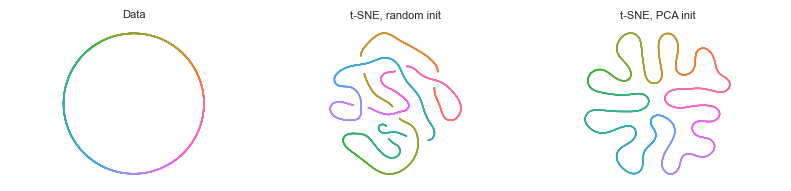

In [12]:

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X,Z1,Z2],1):
    plt.subplot(1,3,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()
# plt.savefig('tsne-circle.png', dpi=300)
# plt.savefig('tsne-umap-circle.pdf', dpi=300)